In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-airports/World_Airports.csv


In [2]:
# Loading the extracted .csv file
df = pd.read_csv('/kaggle/input/world-airports/World_Airports.csv')

# Displaying the first few rows of the dataframe
df.head()


,X,Y,OBJECTID,id,airport_ident,type,name,latitude_deg,longitude_deg,elevation_ft,...,home_link,wikipedia_link,keywords,description,frequency_mhz,runway_length_ft,runway_width_ft,runway_surface,runway_lighted,runway_closed
0,-1.301162e+07,4.212194e+06,1,6528,00CA,small_airport,Goldstone (GTS) Airport,35.354740,-116.885329,3038.0,...,NaN,NaN,NaN,CTAF,122.9,6000.0,80.0,ASPH,0.0,0.0
1,-9.034601e+06,3.347916e+06,2,6589,01FL,small_airport,Cedar Knoll Flying Ranch Airport,28.781900,-81.159203,19.0,...,NaN,NaN,NaN,NaN,122.9,3000.0,50.0,TURF,1.0,0.0
2,-1.309952e+07,4.104774e+06,3,6756,04CA,small_airport,Gray Butte Field,34.563900,-117.675003,3020.0,...,NaN,NaN,NaN,CTAF,122.9,5000.0,150.0,ASPH,0.0,0.0
3,-1.011189e+07,3.887414e+06,4,6779,04MS,small_airport,Nick's Flying Service Inc Airport,32.940537,-90.836683,100.0,...,NaN,NaN,NaN,UNICOM,122.8,3400.0,100.0,ASPH-TURF,0.0,0.0
4,-1.287577e+07,4.267031e+06,5,6784,04NV,small_airport,Kingston Ranch Airport,35.755501,-115.665001,2620.0,...,NaN,NaN,NaN,UNICOM,123.0,3240.0,45.0,ASPH,1.0,0.0


In [3]:
# Checking for missing values
missing_values = df.isnull().sum()

# Counting the number of unique airports
unique_airports = df['airport_ident'].nunique()

missing_values, unique_airports


(X                        1
 Y                        1
 OBJECTID                 0
 id                       0
 airport_ident            0
 type                     0
 name                     0
 latitude_deg             0
 longitude_deg            0
 elevation_ft         14263
 continent            36226
 iso_country            259
 iso_region               0
 municipality          4992
 scheduled_service        0
 gps_code             33880
 iata_code            66184
 local_code           42500
 home_link            71451
 wikipedia_link       64178
 keywords             58385
 description          64992
 frequency_mhz        64379
 runway_length_ft     37233
 runway_width_ft      39477
 runway_surface       37488
 runway_lighted       37053
 runway_closed        37053
 dtype: int64,
 75052)

In [4]:
# Displaying the descriptive statistics of numerical columns
df.describe()


,X,Y,OBJECTID,id,latitude_deg,longitude_deg,elevation_ft,frequency_mhz,runway_length_ft,runway_width_ft,runway_lighted,runway_closed
count,7.505100e+04,7.505100e+04,75052.000000,75052.000000,75052.000000,75052.000000,60789.000000,10673.000000,37819.000000,35575.000000,37999.000000,37999.000000
mean,-3.188512e+06,3.214841e+06,37526.500000,156746.571204,25.614653,-28.642508,1301.113359,131.459692,3050.838282,103.857006,0.232796,0.009395
std,9.599855e+06,3.325248e+06,21665.790539,160534.385051,26.295437,86.236455,1672.571965,70.497489,2589.459464,222.126728,0.422619,0.096473
min,-2.002382e+07,-1.574333e+07,1.000000,2.000000,-90.000000,-179.876999,-1266.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.047368e+07,1.269899e+06,18763.750000,18909.750000,11.325231,-94.086565,205.000000,120.075000,1500.000000,59.000000,0.000000,0.000000
50%,-7.723717e+06,4.180065e+06,37526.500000,40239.500000,35.118995,-69.383331,730.000000,122.900000,2623.000000,75.000000,0.000000,0.000000
75%,2.715492e+06,5.260454e+06,56289.250000,334350.250000,42.660451,24.393038,1613.000000,126.700000,3999.000000,100.000000,0.000000,0.000000
max,2.003480e+07,1.759752e+07,75052.000000,508396.000000,82.750000,179.975700,17372.000000,1340.000000,30000.000000,9000.000000,1.000000,1.000000


/tmp/ipykernel_20/1247926901.py:11: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


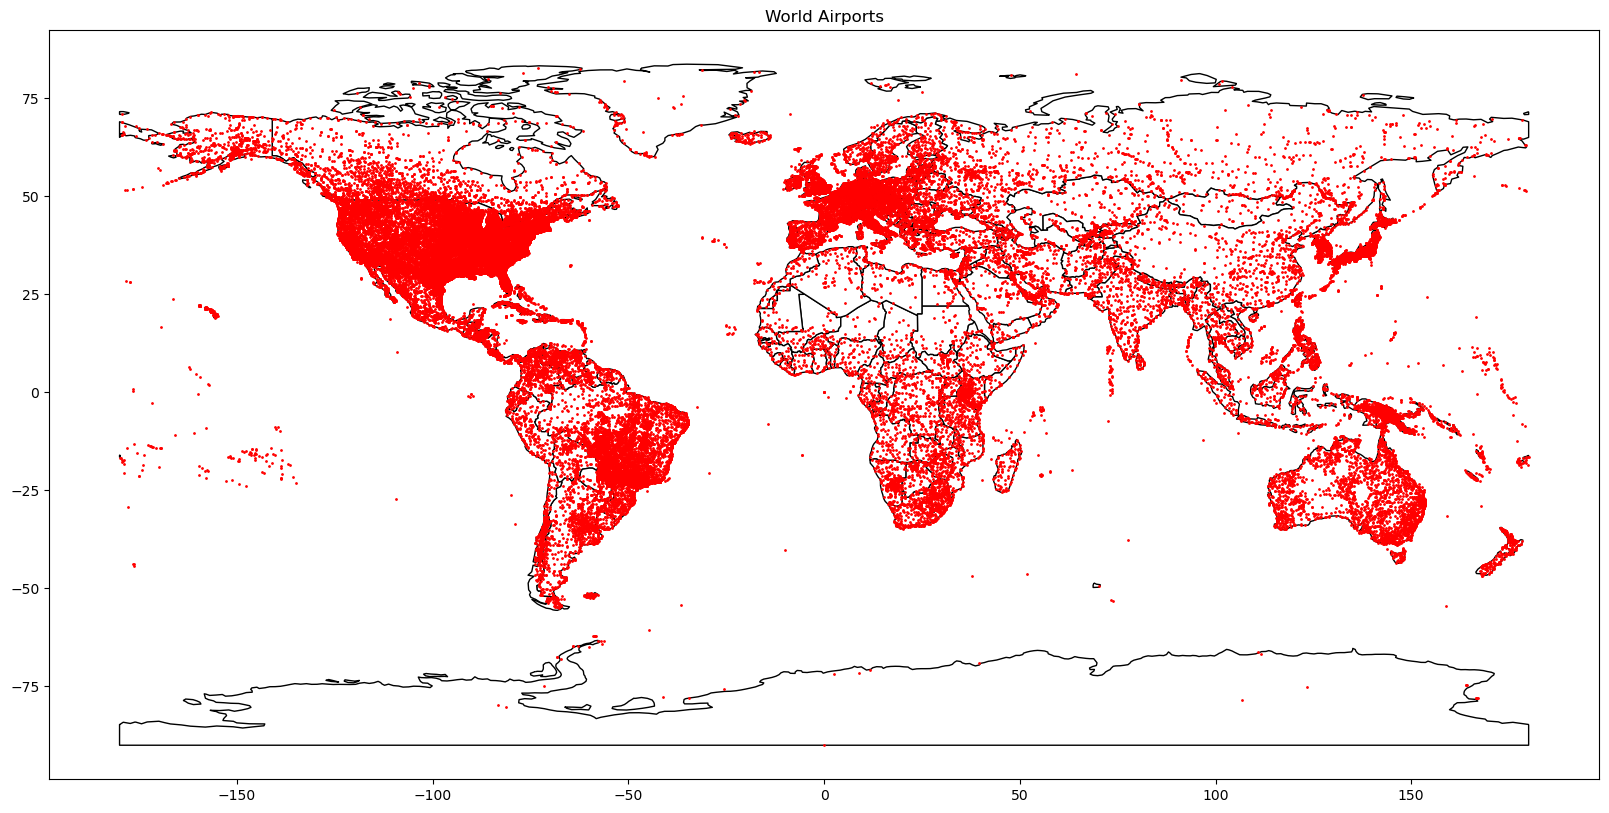

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Converting the dataframe to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude_deg, df.latitude_deg))

# Setting the coordinate reference system (CRS) to EPSG 4326
gdf.crs = "EPSG:4326"

# Creating a world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plotting the world map
fig, ax = plt.subplots(figsize=(20, 10))
world.plot(ax=ax, color='white', edgecolor='black')
gdf.plot(ax=ax, color='red', markersize=1)
plt.title('World Airports')
plt.show()


In [6]:
# Counting the number of airports in each country
airport_counts = df['iso_country'].value_counts()

# Displaying the top 5 countries with the most airports
top_countries = airport_counts[:5]

top_countries


US    30003
BR     6669
JP     3312
CA     2959
AU     2553
Name: iso_country, dtype: int64

In [7]:
# Displaying the columns of the world GeoDataFrame
world.columns


Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')

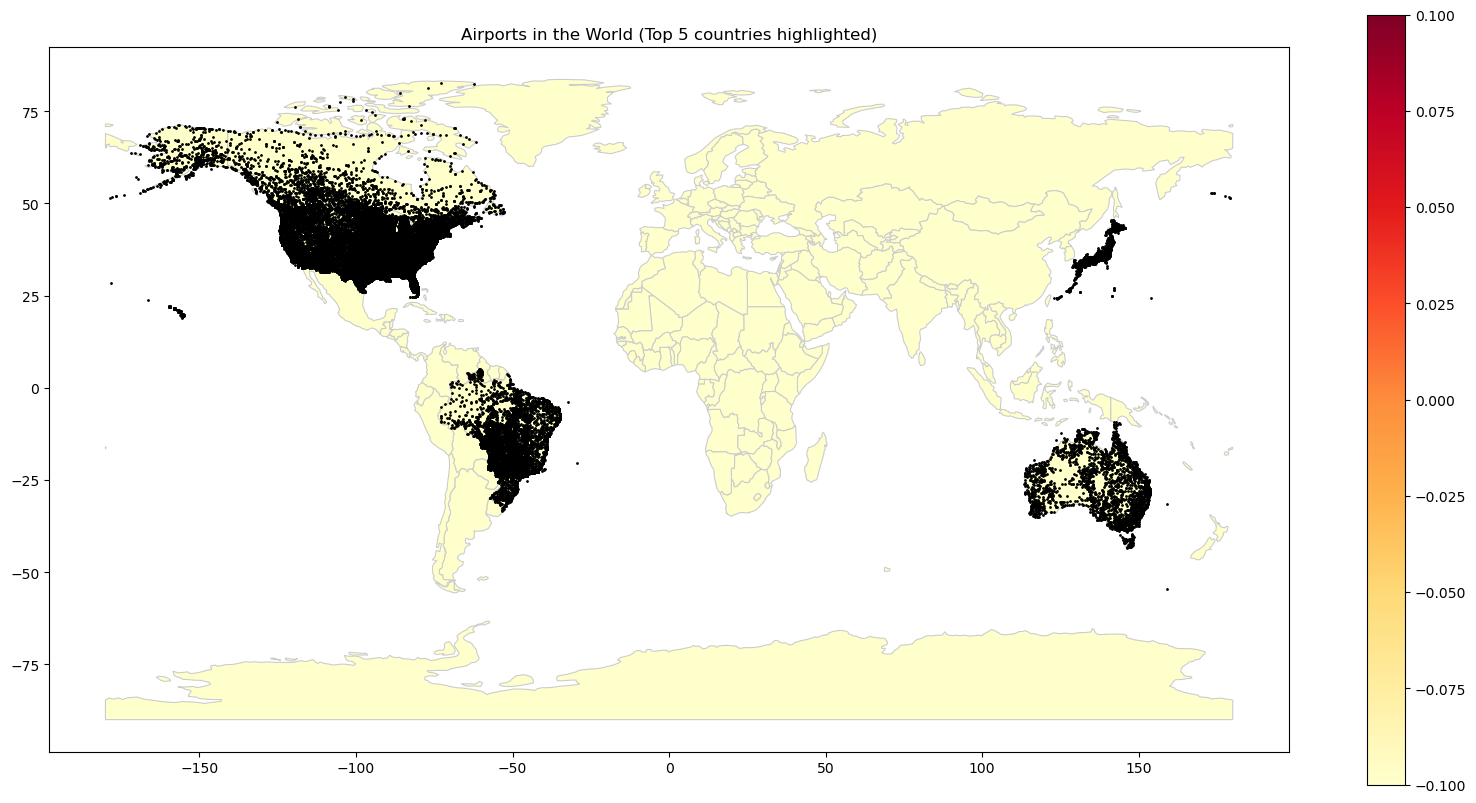

In [8]:
# Creating a new column in the world GeoDataFrame that contains the number of airports in each country
world['num_airports'] = world['iso_a3'].map(airport_counts)

# Filling missing values with 0
world['num_airports'] = world['num_airports'].fillna(0)

# Creating a figure and axes
fig, ax = plt.subplots(figsize=(20, 10))

# Plotting the countries, colored by the number of airports
world.plot(column='num_airports', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Plotting the airports in the top 5 countries
for country in top_countries.index:
    gdf[gdf['iso_country'] == country].plot(ax=ax, color='black', markersize=1)

plt.title('Airports in the World (Top 5 countries highlighted)')
plt.show()


In [9]:
# Filtering the data for the top 5 countries
top_countries_data = df[df['iso_country'].isin(top_countries.index)]

# Displaying the first few rows of the filtered data
top_countries_data.head()


,X,Y,OBJECTID,id,airport_ident,type,name,latitude_deg,longitude_deg,elevation_ft,...,home_link,wikipedia_link,keywords,description,frequency_mhz,runway_length_ft,runway_width_ft,runway_surface,runway_lighted,runway_closed
0,-1.301162e+07,4.212194e+06,1,6528,00CA,small_airport,Goldstone (GTS) Airport,35.354740,-116.885329,3038.0,...,NaN,NaN,NaN,CTAF,122.9,6000.0,80.0,ASPH,0.0,0.0
1,-9.034601e+06,3.347916e+06,2,6589,01FL,small_airport,Cedar Knoll Flying Ranch Airport,28.781900,-81.159203,19.0,...,NaN,NaN,NaN,NaN,122.9,3000.0,50.0,TURF,1.0,0.0
2,-1.309952e+07,4.104774e+06,3,6756,04CA,small_airport,Gray Butte Field,34.563900,-117.675003,3020.0,...,NaN,NaN,NaN,CTAF,122.9,5000.0,150.0,ASPH,0.0,0.0
3,-1.011189e+07,3.887414e+06,4,6779,04MS,small_airport,Nick's Flying Service Inc Airport,32.940537,-90.836683,100.0,...,NaN,NaN,NaN,UNICOM,122.8,3400.0,100.0,ASPH-TURF,0.0,0.0
4,-1.287577e+07,4.267031e+06,5,6784,04NV,small_airport,Kingston Ranch Airport,35.755501,-115.665001,2620.0,...,NaN,NaN,NaN,UNICOM,123.0,3240.0,45.0,ASPH,1.0,0.0


In [10]:
# Counting the number of each type of airport in the top 5 countries
airport_type_counts = top_countries_data.groupby('iso_country')['type'].value_counts()

# Displaying the counts
airport_type_counts


iso_country  type          
AU           small_airport      1942
             heliport            355
             medium_airport      184
             closed               62
             large_airport         6
             seaplane_base         4
BR           small_airport      4585
             heliport           1699
             closed              251
             medium_airport      124
             large_airport         8
             seaplane_base         2
CA           small_airport      1049
             closed              718
             heliport            462
             seaplane_base       387
             medium_airport      329
             large_airport        13
             balloonport           1
JP           heliport           2619
             closed              407
             small_airport       170
             medium_airport       95
             large_airport        12
             seaplane_base         6
             balloonport           3
US        

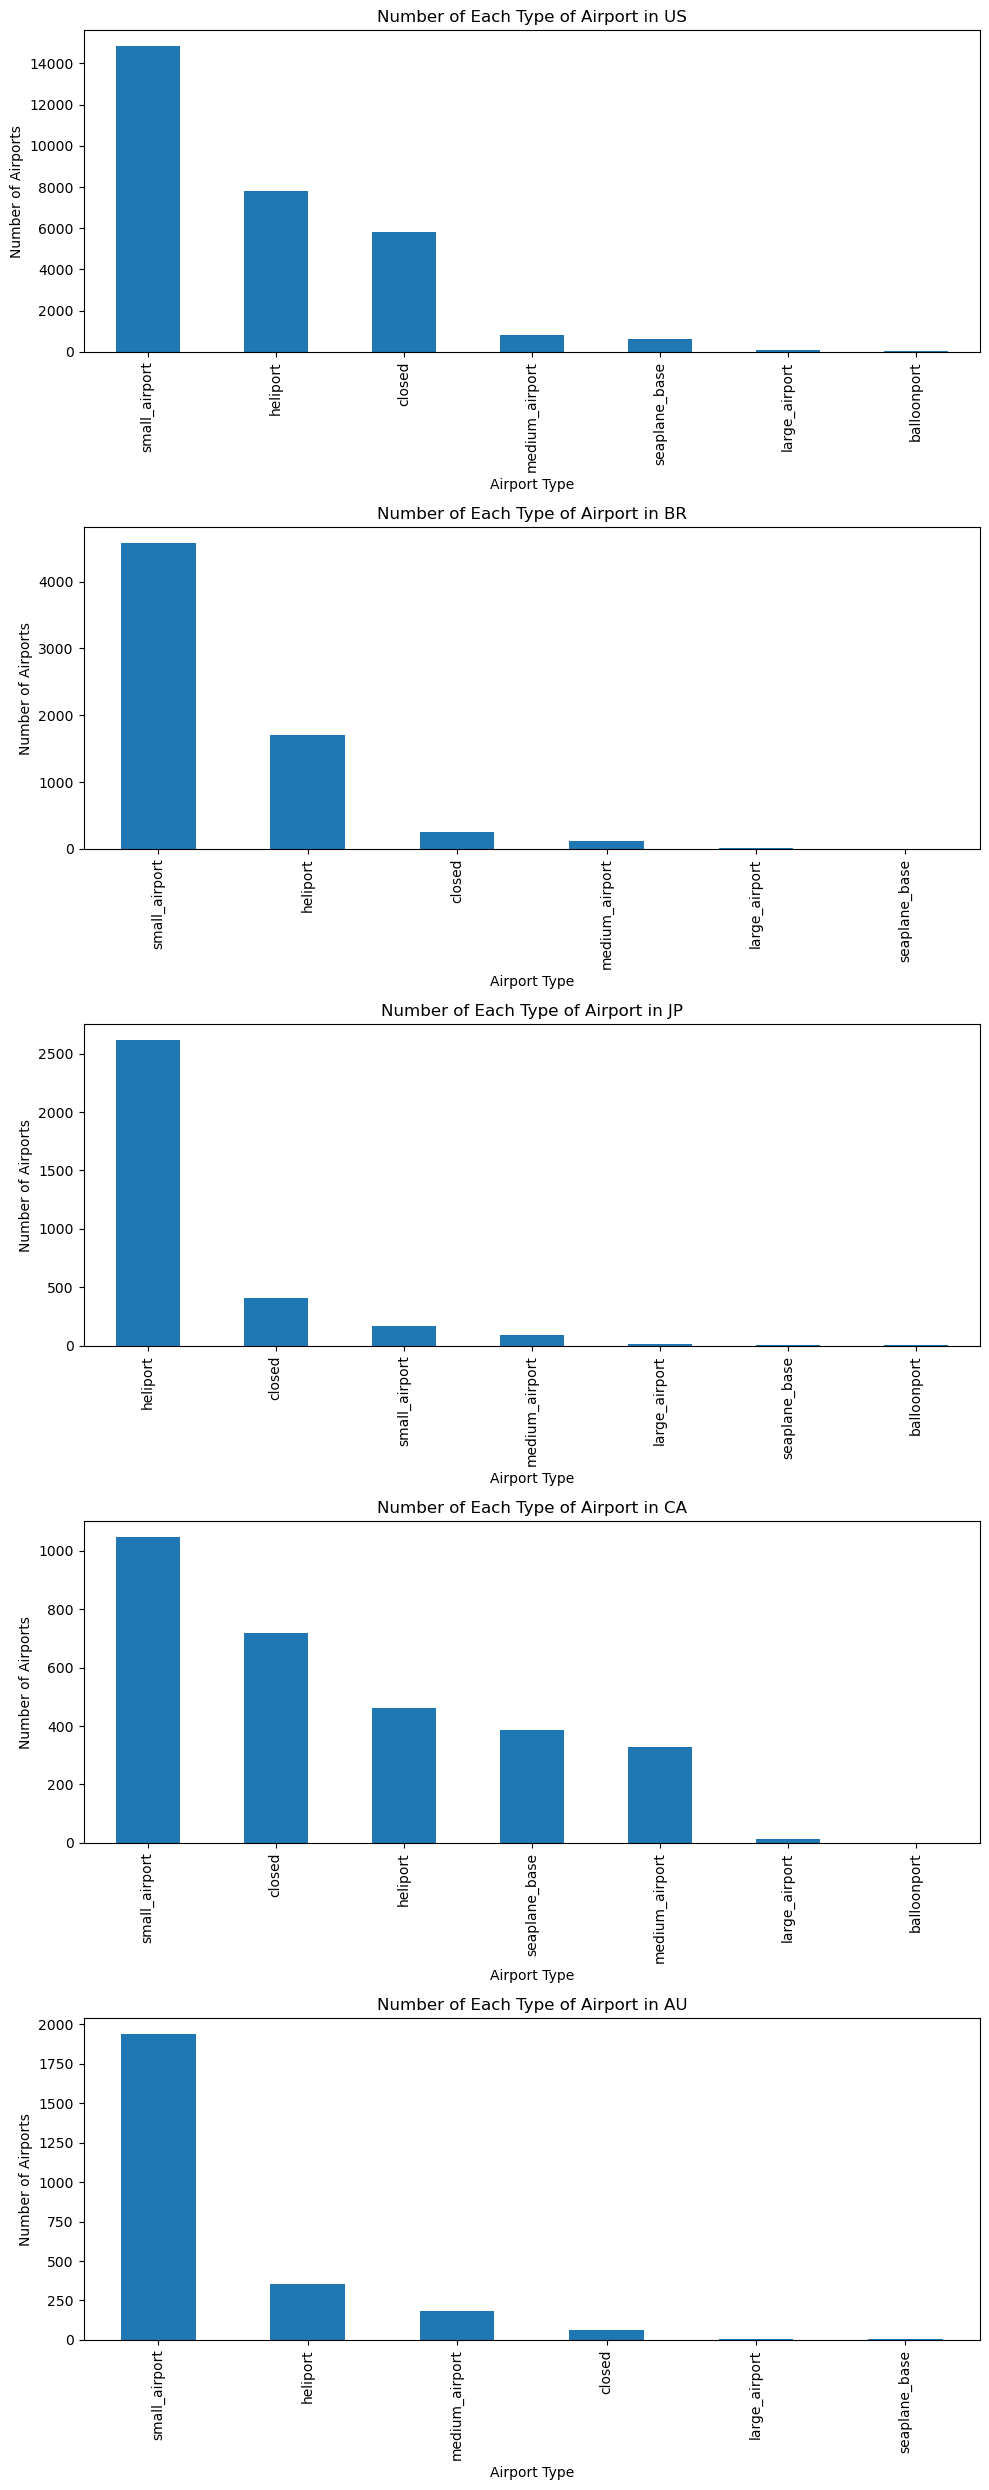

In [11]:
# Creating a figure and axes
fig, ax = plt.subplots(5, 1, figsize=(10, 25))

# Looping through the top 5 countries
for i, country in enumerate(top_countries.index):
    # Selecting the data for the current country
    data = airport_type_counts[country]
    
    # Creating a bar plot
    data.plot(kind='bar', ax=ax[i])
    
    # Setting the title
    ax[i].set_title(f'Number of Each Type of Airport in {country}')
    ax[i].set_xlabel('Airport Type')
    ax[i].set_ylabel('Number of Airports')

# Adjusting the layout
plt.tight_layout()

# Displaying the plot
plt.show()


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


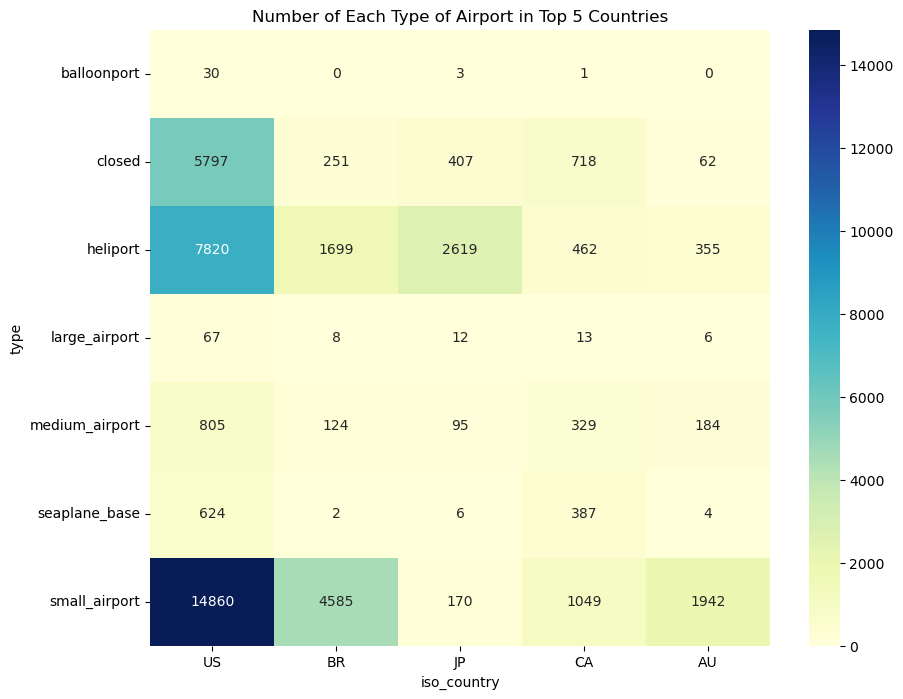

In [12]:
import seaborn as sns

# Preparing the data for the heat map
heatmap_data = airport_type_counts.unstack(level=0).fillna(0)

# Creating the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data[top_countries.index], cmap="YlGnBu", annot=True, fmt=".0f")

# Setting the title
plt.title('Number of Each Type of Airport in Top 5 Countries')

# Displaying the plot
plt.show()


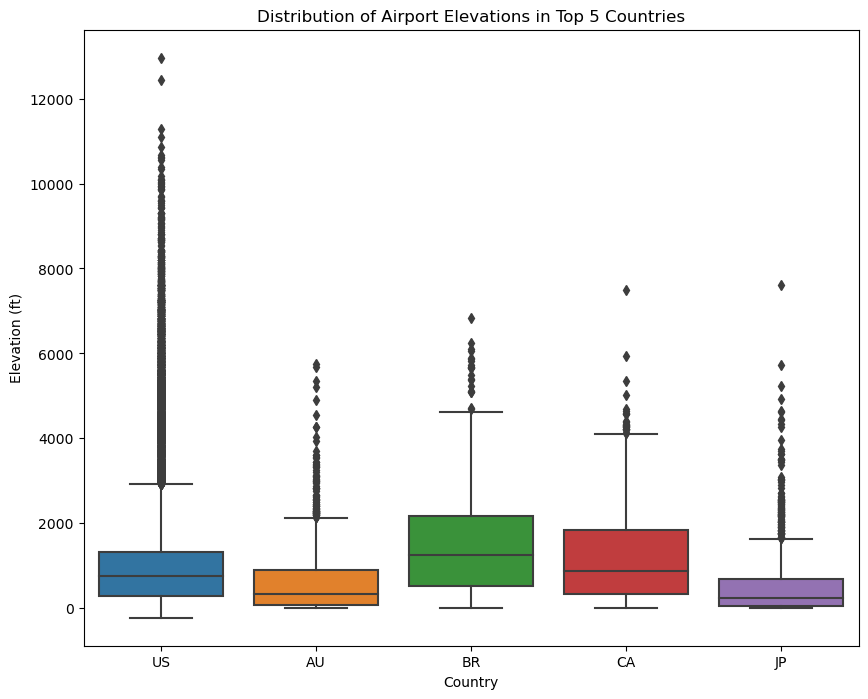

In [13]:
# Creating a figure
plt.figure(figsize=(10, 8))

# Creating a box plot of airport elevations in the top 5 countries
sns.boxplot(x='iso_country', y='elevation_ft', data=top_countries_data)

# Setting the title and labels
plt.title('Distribution of Airport Elevations in Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Elevation (ft)')

# Displaying the plot
plt.show()


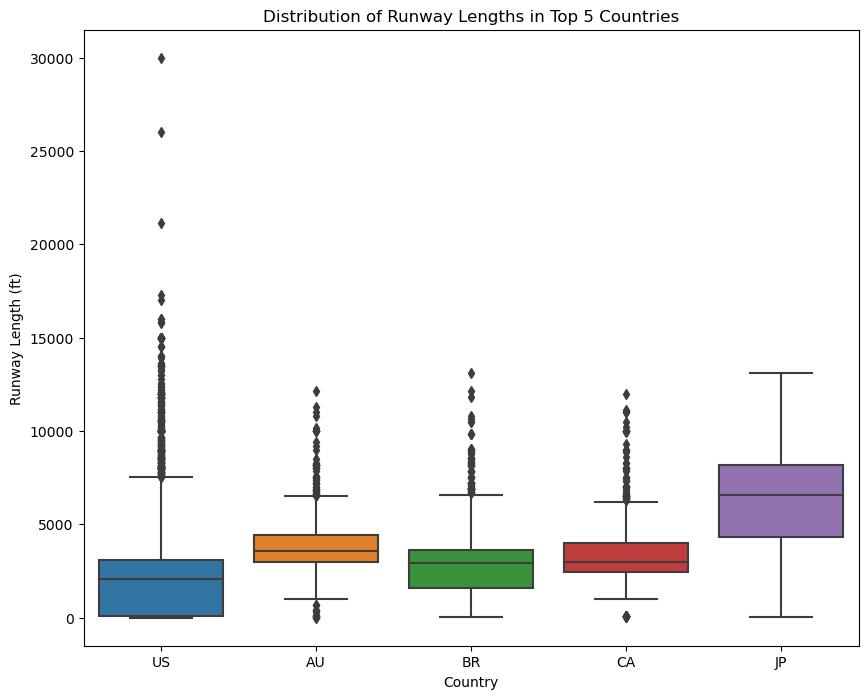

In [14]:
# Creating a figure
plt.figure(figsize=(10, 8))

# Creating a box plot of runway lengths in the top 5 countries
sns.boxplot(x='iso_country', y='runway_length_ft', data=top_countries_data)

# Setting the title and labels
plt.title('Distribution of Runway Lengths in Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Runway Length (ft)')

# Displaying the plot
plt.show()


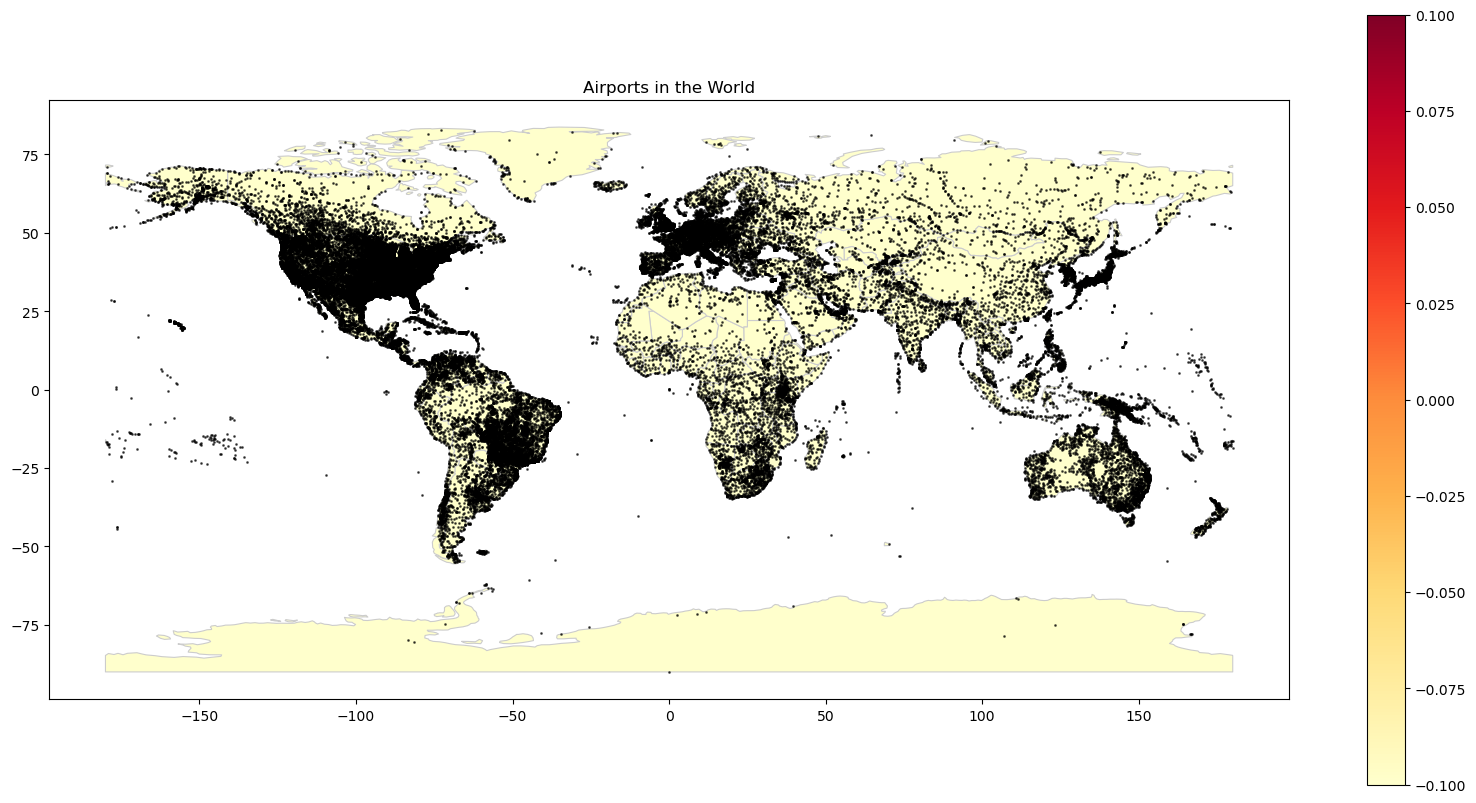

In [15]:
# Creating a figure and axes
fig, ax = plt.subplots(figsize=(20, 10))

# Plotting the countries, colored by the number of airports
world.plot(column='num_airports', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Plotting the airports
gdf.plot(ax=ax, color='black', markersize=1, alpha=0.6)

plt.title('Airports in the World')
plt.show()


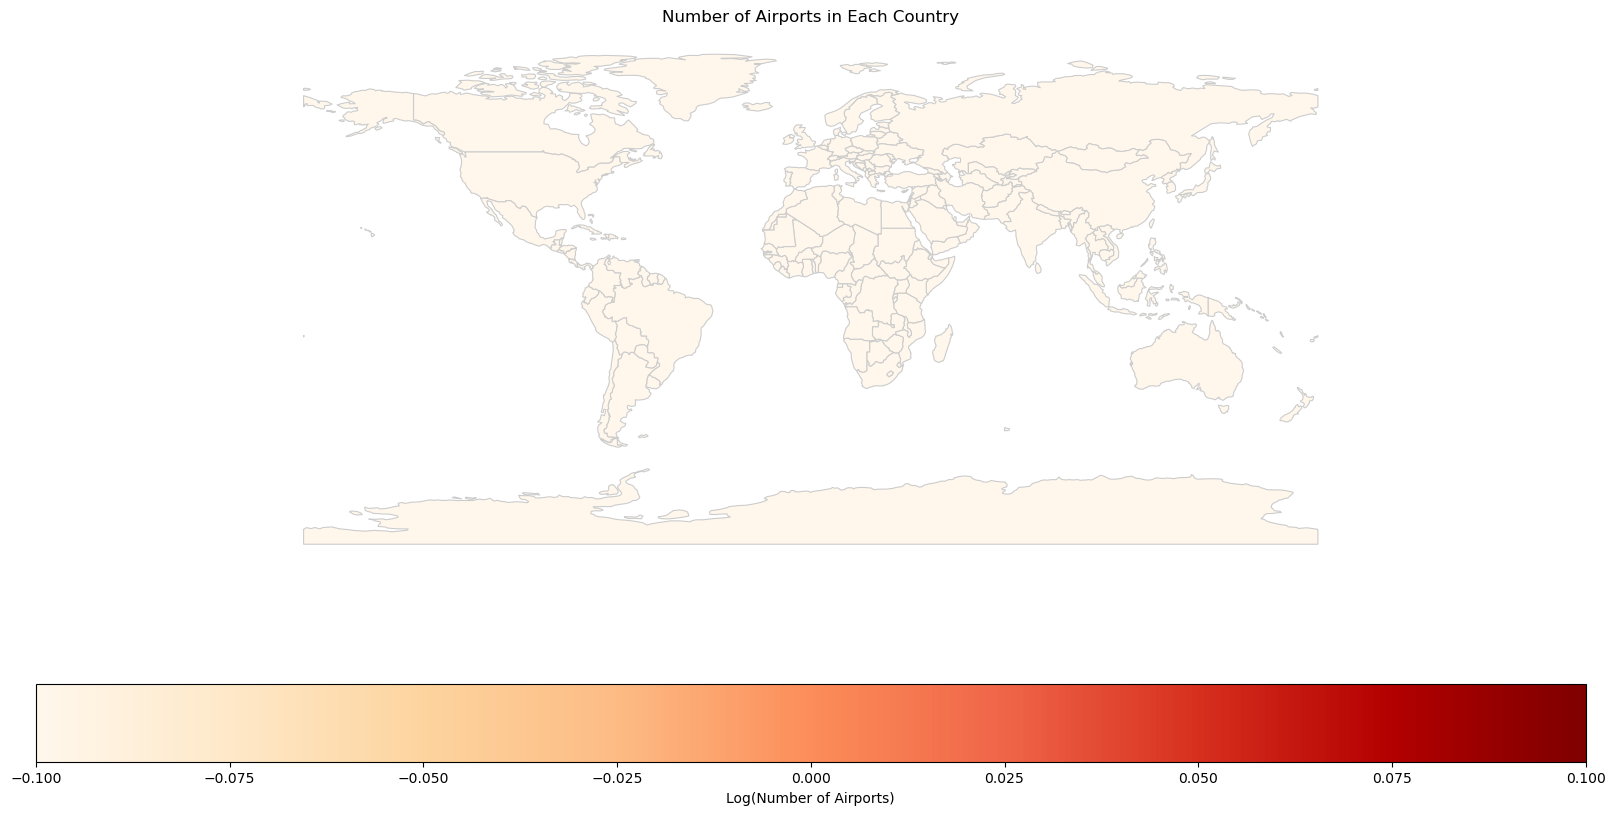

In [16]:
import numpy as np

# Adding the logarithm of the number of airports to the world GeoDataFrame to avoid extreme color differences
world['log_num_airports'] = np.log(world['num_airports'] + 1)

# Creating a figure and axes
fig, ax = plt.subplots(figsize=(20, 10))

# Plotting the choropleth map
world.plot(column='log_num_airports', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, 
           legend_kwds={'label': "Log(Number of Airports)", 'orientation': "horizontal"})

# Setting the title
plt.title('Number of Airports in Each Country')

# Removing the x and y axis
ax.axis('off')

# Displaying the plot
plt.show()


In [17]:
# Counting the number of airports with and without scheduled service in the top 5 countries
scheduled_service_counts = top_countries_data.groupby('iso_country')['scheduled_service'].value_counts()

# Displaying the counts
scheduled_service_counts


iso_country  scheduled_service
AU           no                    2389
             yes                    164
BR           no                    6520
             yes                    149
CA           no                    2705
             yes                    254
JP           no                    3229
             yes                     83
US           no                   29496
             yes                    507
Name: scheduled_service, dtype: int64

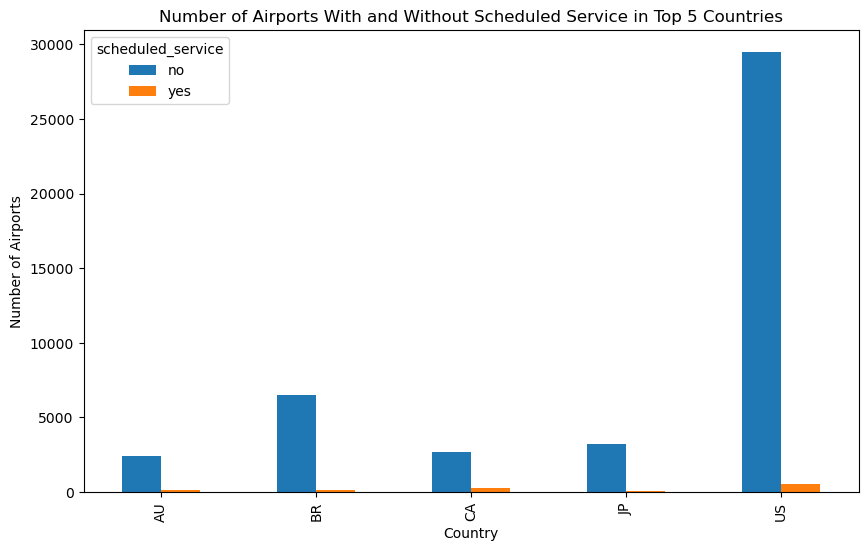

In [18]:
# Creating a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Preparing the data for the plot
plot_data = scheduled_service_counts.unstack(level=1)

# Creating a bar plot
plot_data.plot(kind='bar', ax=ax)

# Setting the title and labels
ax.set_title('Number of Airports With and Without Scheduled Service in Top 5 Countries')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Airports')

# Displaying the plot
plt.show()


In [19]:
# Counting the number of each type of runway surface in the top 5 countries
runway_surface_counts = top_countries_data.groupby('iso_country')['runway_surface'].value_counts()

# Displaying the counts
runway_surface_counts


iso_country  runway_surface  
AU           X                   351
             N                   273
             ASP                 216
             G                   167
             C                   111
                                ... 
US           asphalt/concrete      1
             asphalt/dirt          1
             lakebed               1
             tURF                  1
             water                 1
Name: runway_surface, Length: 441, dtype: int64

In [20]:
# Identifying the top 5 most common runway surfaces in each country
top_runway_surfaces = runway_surface_counts.groupby(level=0).nlargest(5)

# Displaying the top runway surfaces
top_runway_surfaces


iso_country  iso_country  runway_surface
AU           AU           X                  351
                          N                  273
                          ASP                216
                          G                  167
                          C                  111
BR           BR           ASP               1529
                          GRS                864
                          CON                828
                          GRE                669
                          GVL                342
CA           CA           ASP                396
                          TURF               254
                          GRAVEL              87
                          GVL                 60
                          ASPHALT             43
JP           JP           ASP                 94
                          CON                 15
                          asphalt              9
                          UNK                  8
                          PE

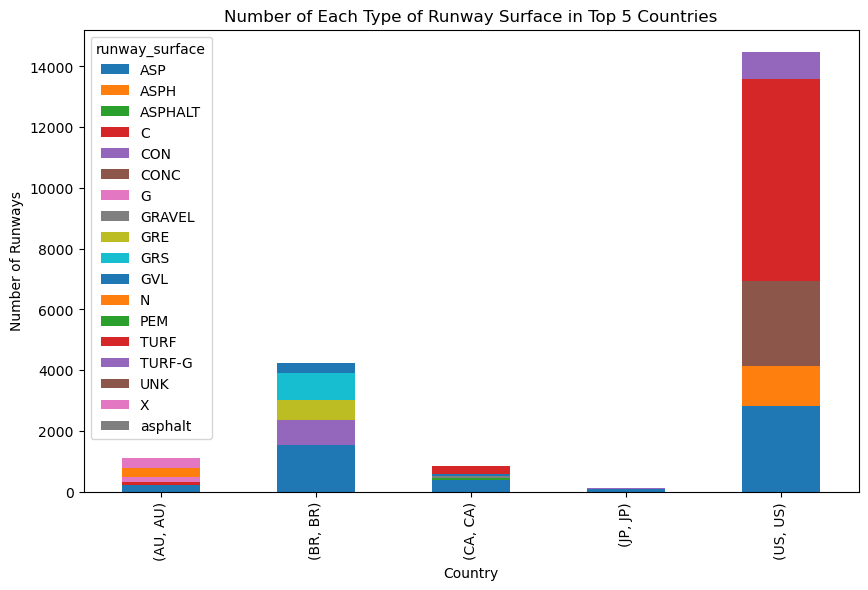

In [21]:
# Preparing the data for the plot
plot_data = top_runway_surfaces.unstack(level=2).fillna(0)

# Creating a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Creating a stacked bar plot
plot_data.plot(kind='bar', stacked=True, ax=ax)

# Setting the title and labels
ax.set_title('Number of Each Type of Runway Surface in Top 5 Countries')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Runways')

# Displaying the plot
plt.show()


In [22]:
# Displaying the columns of the dataset
df.columns


Index(['X', 'Y', 'OBJECTID', 'id', 'airport_ident', 'type', 'name',
       'latitude_deg', 'longitude_deg', 'elevation_ft', 'continent',
       'iso_country', 'iso_region', 'municipality', 'scheduled_service',
       'gps_code', 'iata_code', 'local_code', 'home_link', 'wikipedia_link',
       'keywords', 'description', 'frequency_mhz', 'runway_length_ft',
       'runway_width_ft', 'runway_surface', 'runway_lighted', 'runway_closed'],
      dtype='object')

In [23]:
# Counting the number of airports with and without lighted runways in the top 5 countries
runway_lighted_counts = top_countries_data.groupby('iso_country')['runway_lighted'].value_counts()

# Displaying the counts
runway_lighted_counts


iso_country  runway_lighted
AU           0.0                1283
             1.0                 242
BR           0.0                4614
             1.0                 255
CA           0.0                 787
             1.0                 385
JP           1.0                 108
             0.0                  28
US           0.0               16560
             1.0                4890
Name: runway_lighted, dtype: int64

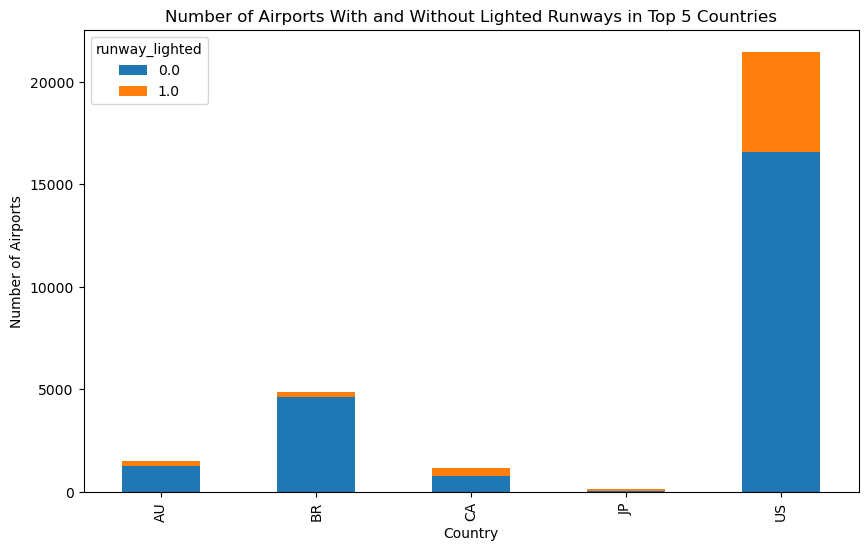

In [24]:
# Preparing the data for the plot
plot_data = runway_lighted_counts.unstack(level=1).fillna(0)

# Creating a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Creating a bar plot
plot_data.plot(kind='bar', stacked=True, ax=ax)

# Setting the title and labels
ax.set_title('Number of Airports With and Without Lighted Runways in Top 5 Countries')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Airports')

# Displaying the plot
plt.show()


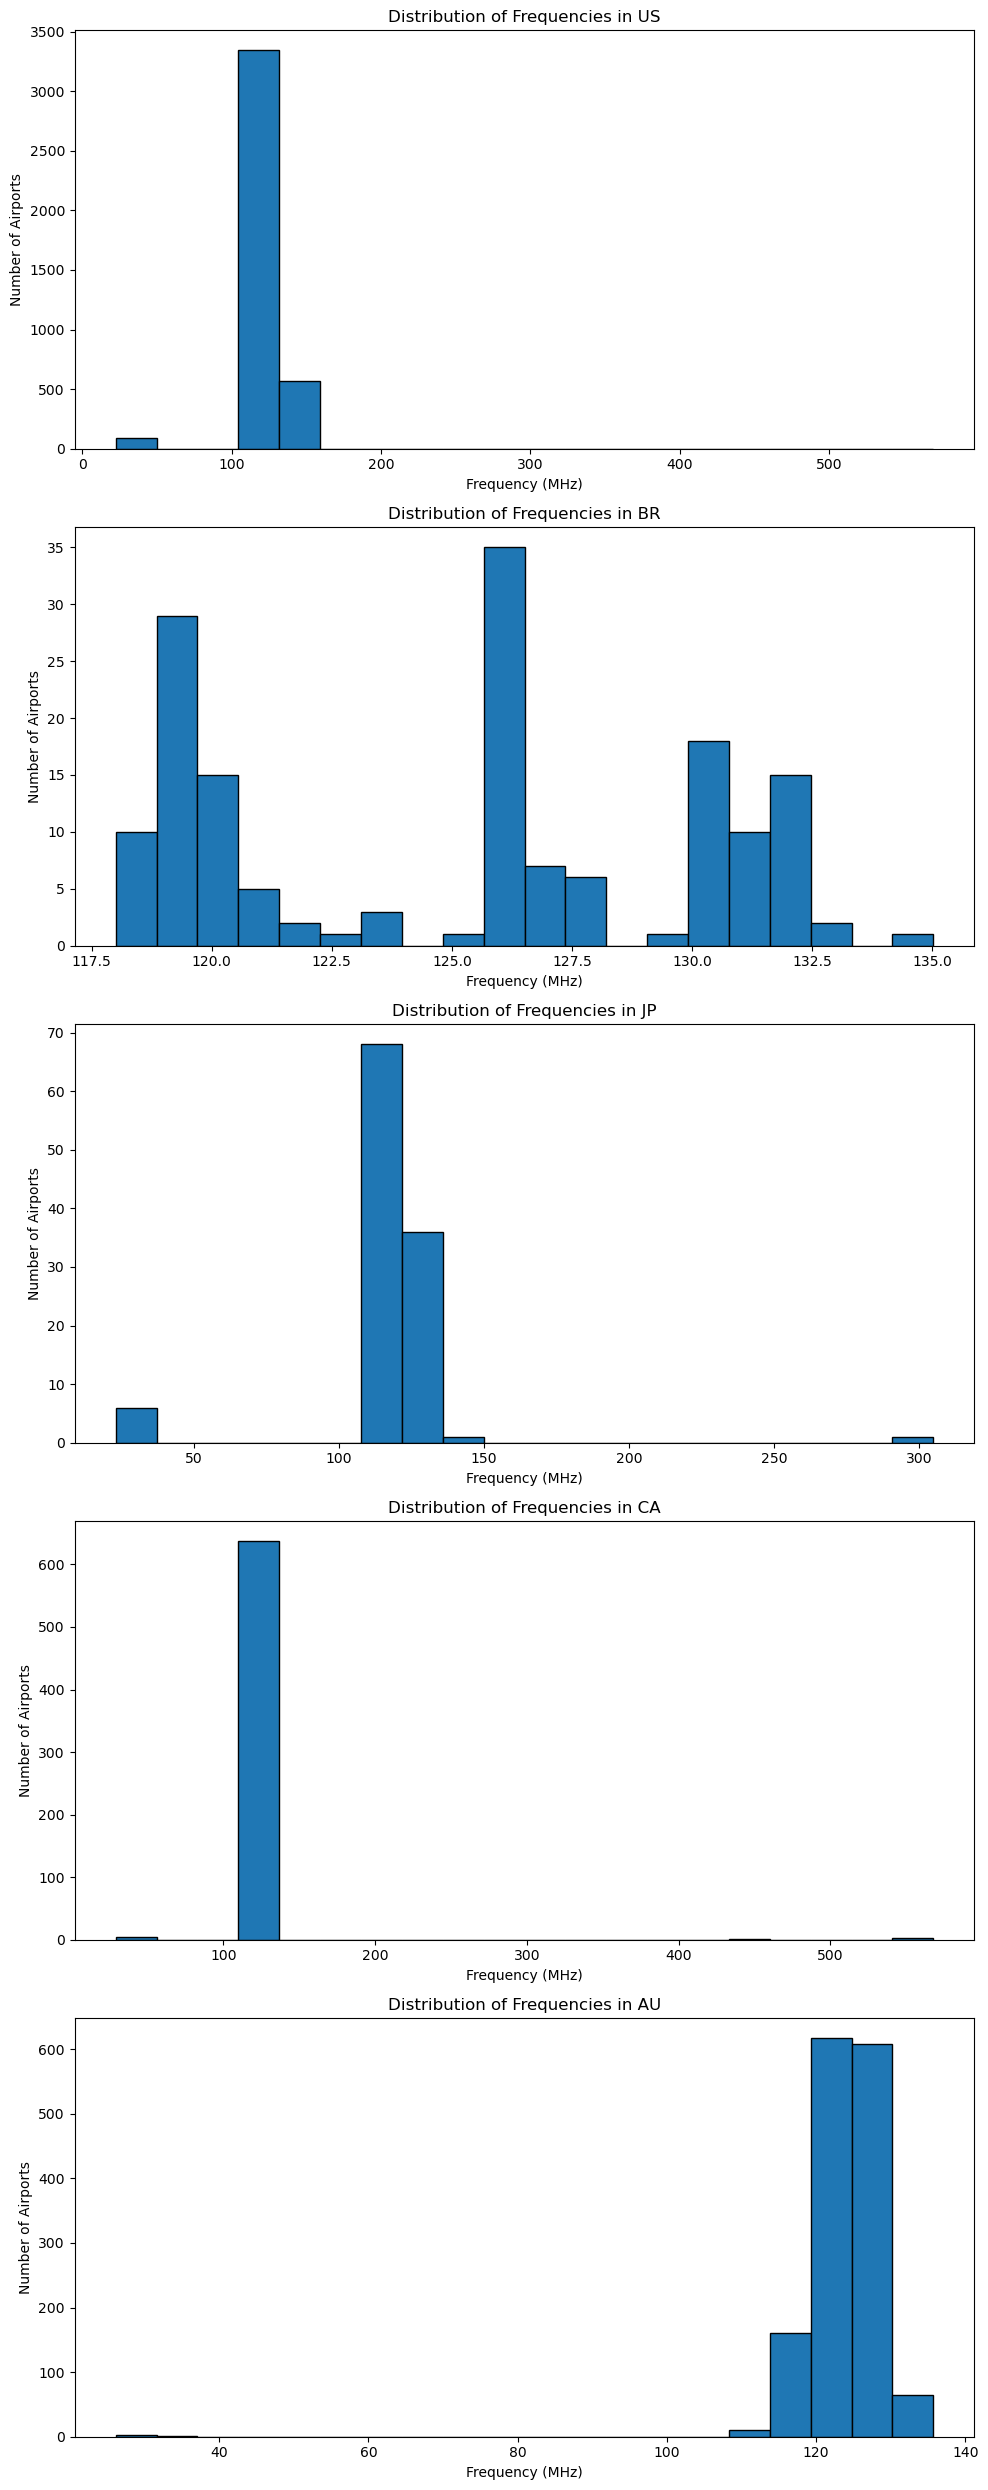

In [25]:
# Creating a figure and axes
fig, ax = plt.subplots(5, 1, figsize=(10, 25))

# Looping through the top 5 countries
for i, country in enumerate(top_countries.index):
    # Selecting the data for the current country
    data = top_countries_data.loc[top_countries_data['iso_country'] == country, 'frequency_mhz'].dropna()
    
    # Creating a histogram
    ax[i].hist(data, bins=20, edgecolor='black')
    
    # Setting the title and labels
    ax[i].set_title(f'Distribution of Frequencies in {country}')
    ax[i].set_xlabel('Frequency (MHz)')
    ax[i].set_ylabel('Number of Airports')

# Adjusting the layout
plt.tight_layout()

# Displaying the plot
plt.show()


In [26]:
# Counting the number of airports with and without closed runways in the top 5 countries
runway_closed_counts = top_countries_data.groupby('iso_country')['runway_closed'].value_counts()

# Displaying the counts
runway_closed_counts


iso_country  runway_closed
AU           0.0               1520
             1.0                  5
BR           0.0               4857
             1.0                 12
CA           0.0               1149
             1.0                 23
JP           0.0                134
             1.0                  2
US           0.0              21277
             1.0                173
Name: runway_closed, dtype: int64

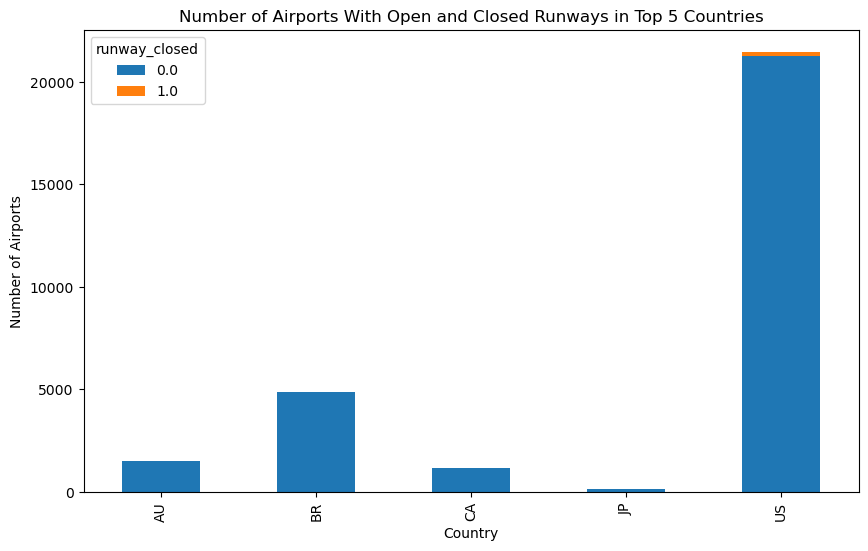

In [27]:
# Preparing the data for the plot
plot_data = runway_closed_counts.unstack(level=1).fillna(0)

# Creating a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Creating a bar plot
plot_data.plot(kind='bar', stacked=True, ax=ax)

# Setting the title and labels
ax.set_title('Number of Airports With Open and Closed Runways in Top 5 Countries')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Airports')

# Displaying the plot
plt.show()


In [28]:
# Counting the number of each type of airport in the top 5 countries
airport_type_counts = top_countries_data.groupby('iso_country')['type'].value_counts()

# Displaying the counts
airport_type_counts


iso_country  type          
AU           small_airport      1942
             heliport            355
             medium_airport      184
             closed               62
             large_airport         6
             seaplane_base         4
BR           small_airport      4585
             heliport           1699
             closed              251
             medium_airport      124
             large_airport         8
             seaplane_base         2
CA           small_airport      1049
             closed              718
             heliport            462
             seaplane_base       387
             medium_airport      329
             large_airport        13
             balloonport           1
JP           heliport           2619
             closed              407
             small_airport       170
             medium_airport       95
             large_airport        12
             seaplane_base         6
             balloonport           3
US        

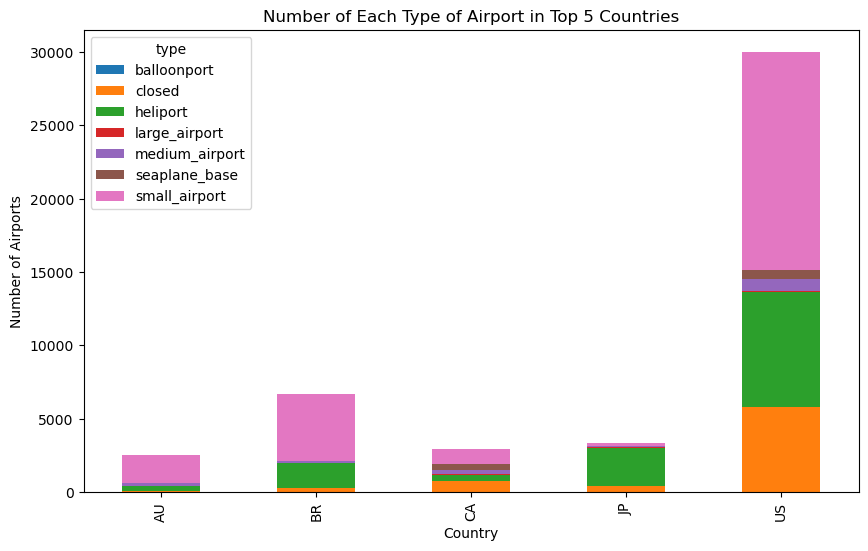

In [29]:
# Preparing the data for the plot
plot_data = airport_type_counts.unstack(level=1).fillna(0)

# Creating a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Creating a stacked bar plot
plot_data.plot(kind='bar', stacked=True, ax=ax)

# Setting the title and labels
ax.set_title('Number of Each Type of Airport in Top 5 Countries')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Airports')

# Displaying the plot
plt.show()


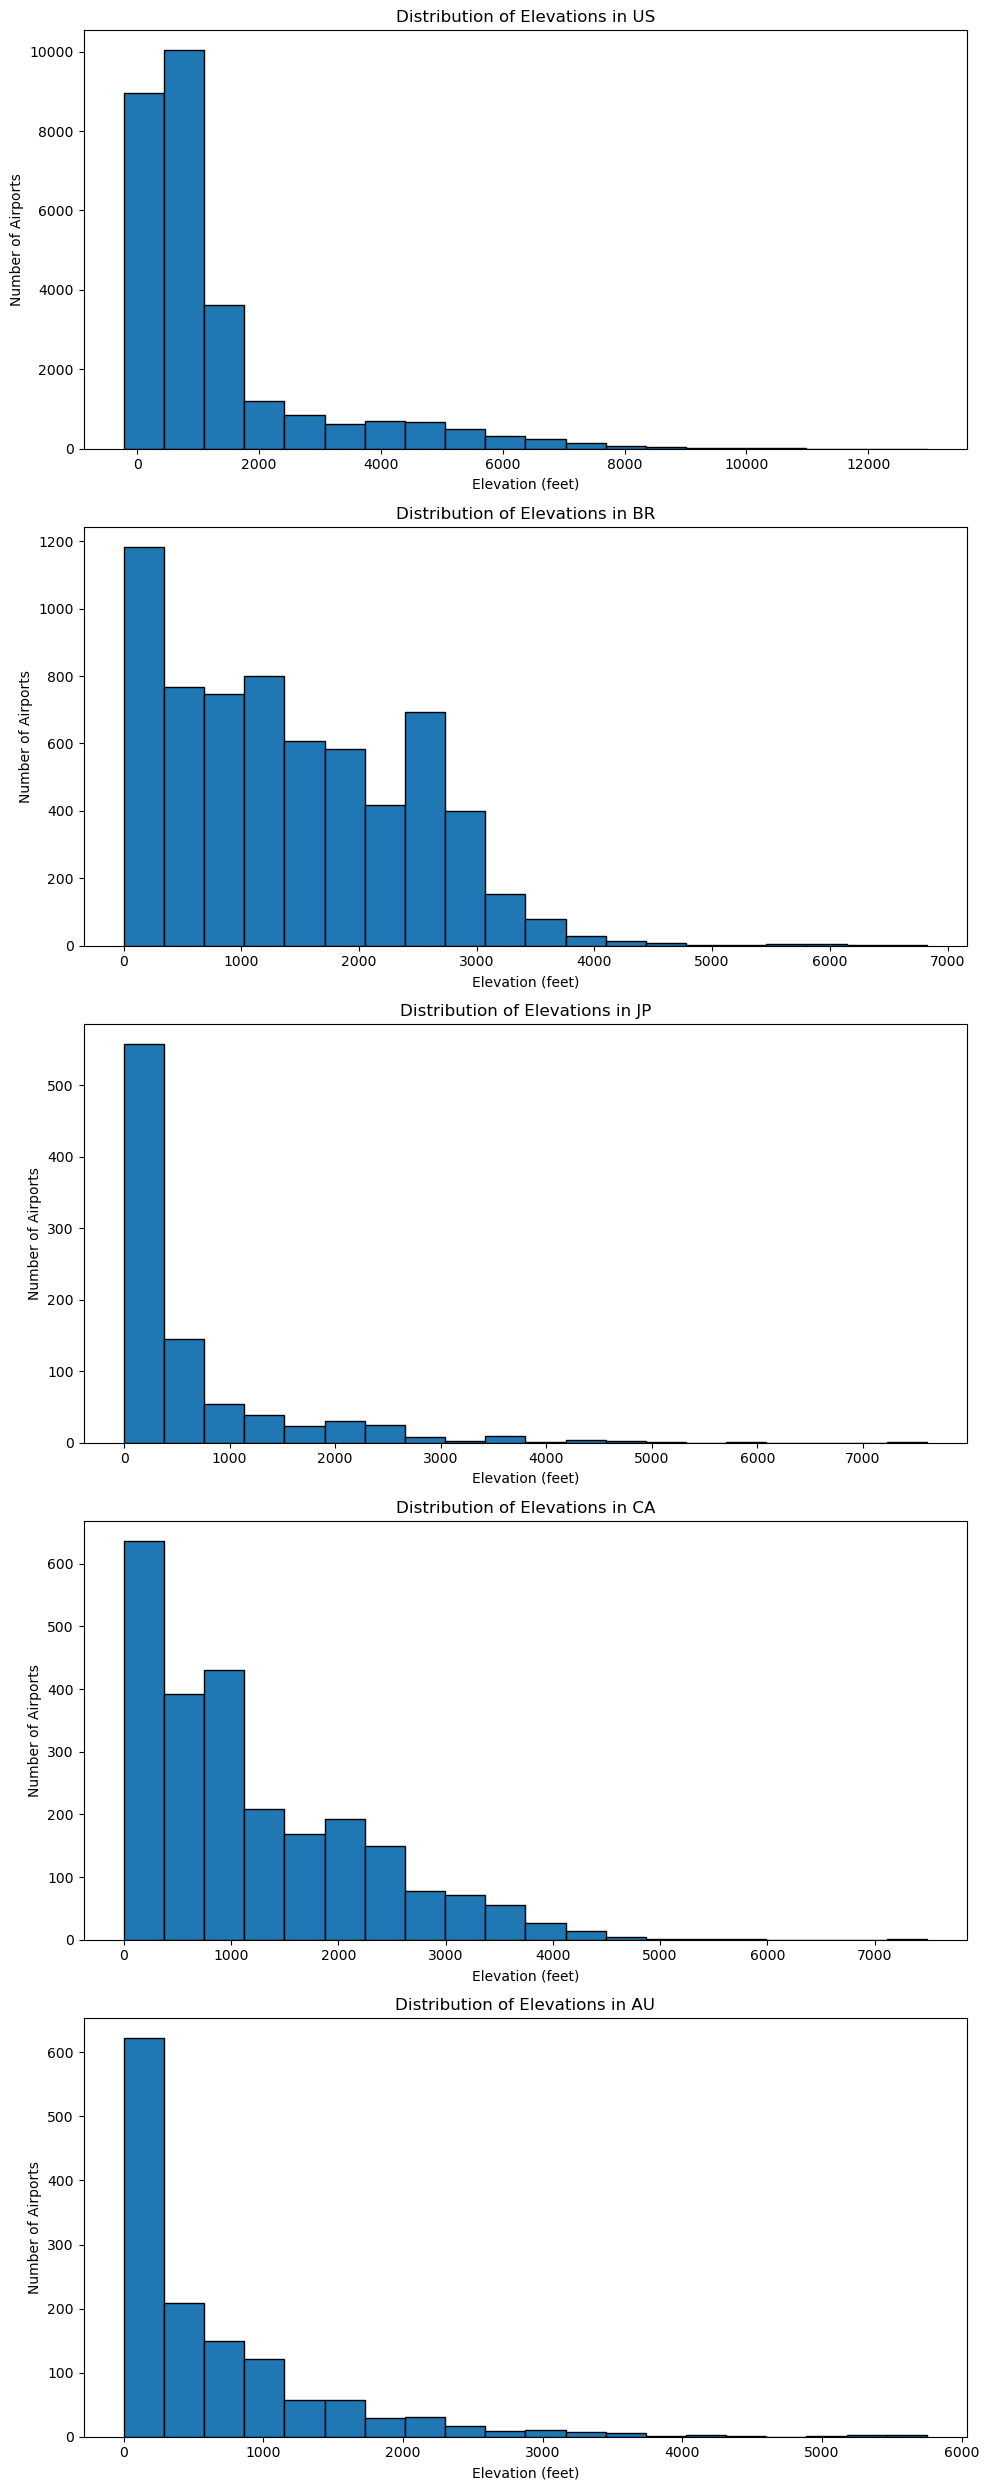

In [30]:
# Creating a figure and axes
fig, ax = plt.subplots(5, 1, figsize=(10, 25))

# Looping through the top 5 countries
for i, country in enumerate(top_countries.index):
    # Selecting the data for the current country
    data = top_countries_data.loc[top_countries_data['iso_country'] == country, 'elevation_ft'].dropna()
    
    # Creating a histogram
    ax[i].hist(data, bins=20, edgecolor='black')
    
    # Setting the title and labels
    ax[i].set_title(f'Distribution of Elevations in {country}')
    ax[i].set_xlabel('Elevation (feet)')
    ax[i].set_ylabel('Number of Airports')

# Adjusting the layout
plt.tight_layout()

# Displaying the plot
plt.show()


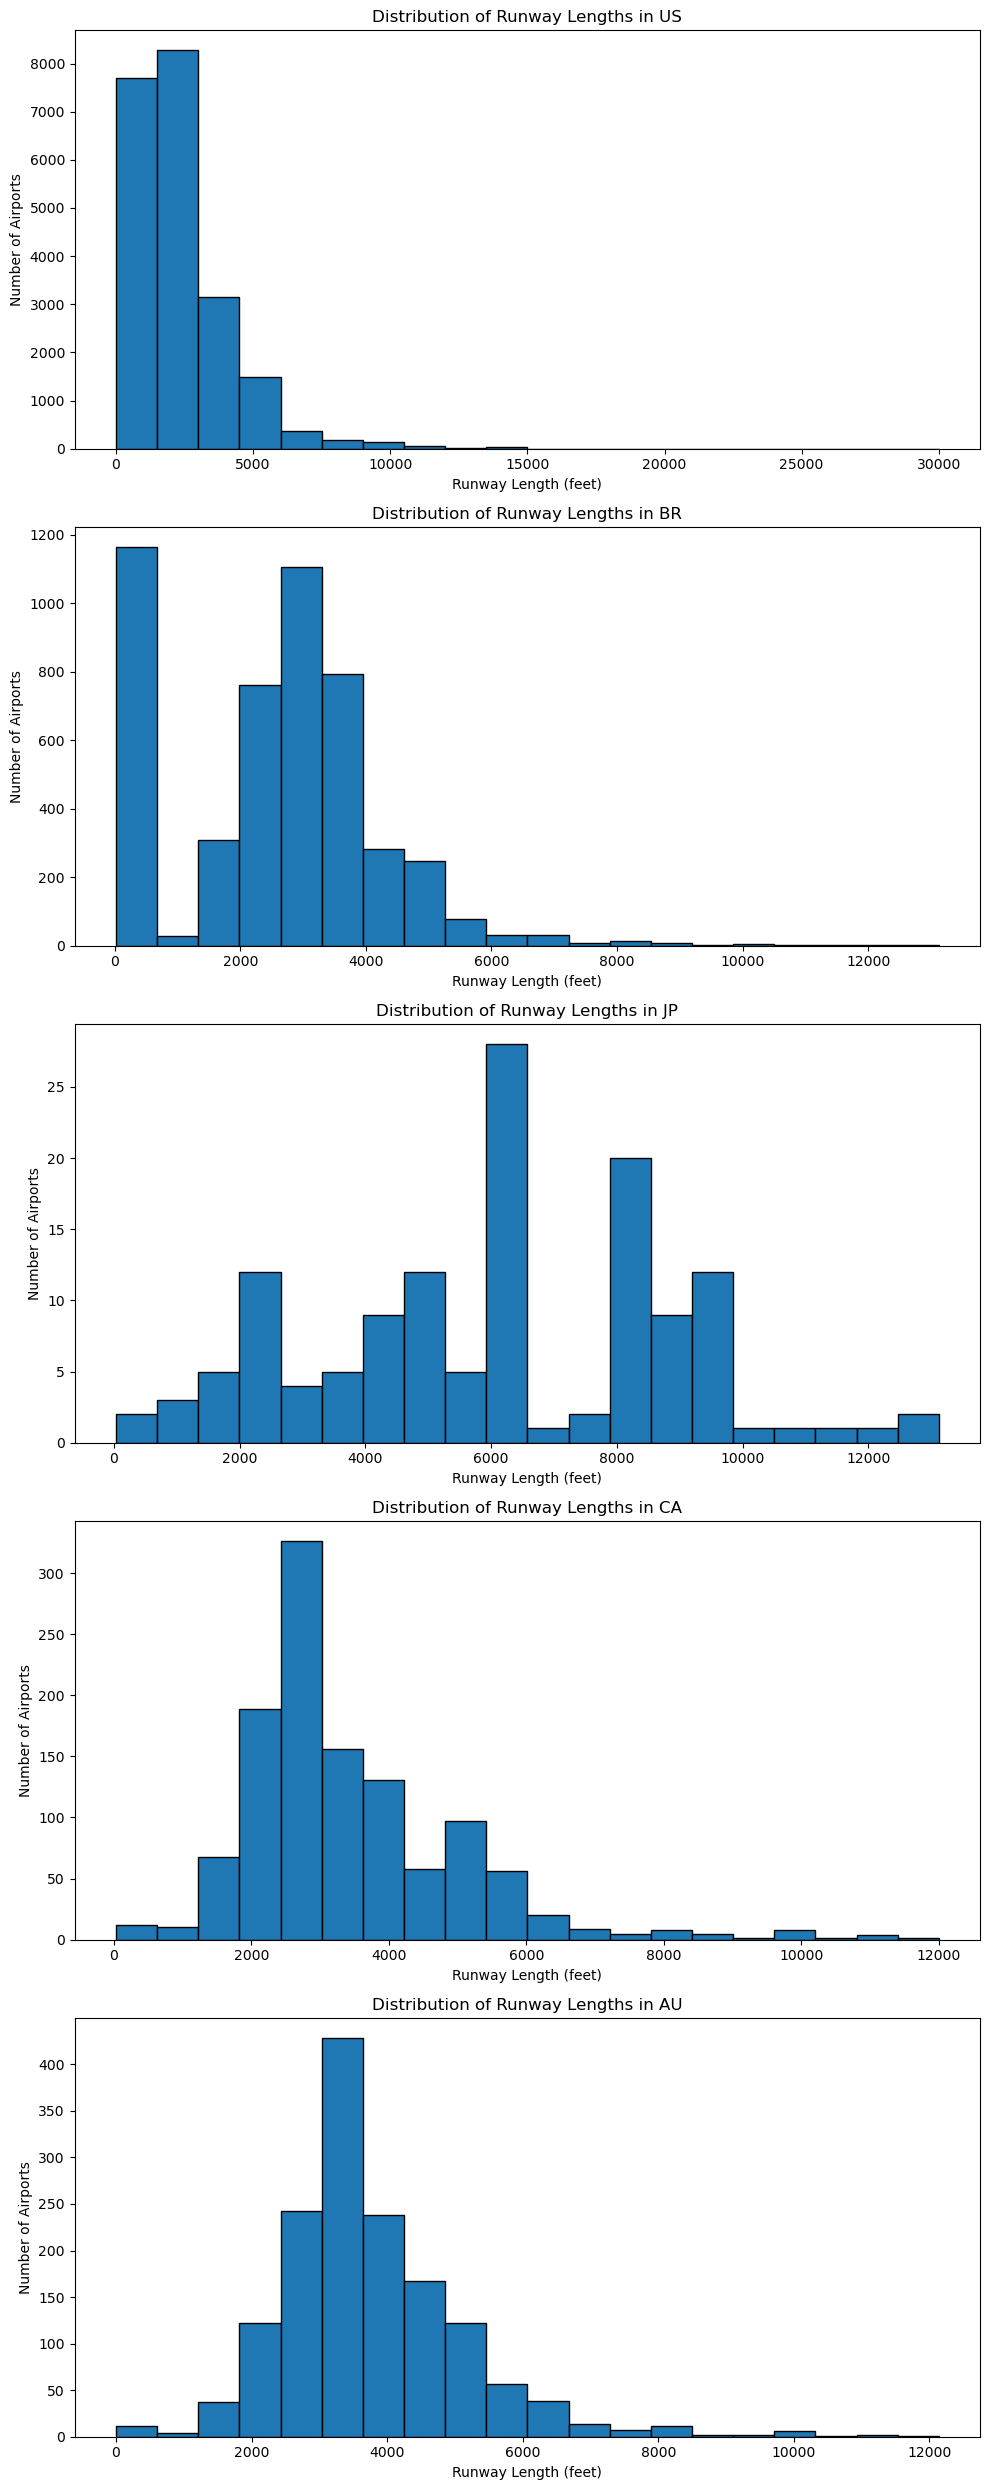

In [31]:
# Creating a figure and axes
fig, ax = plt.subplots(5, 1, figsize=(10, 25))

# Looping through the top 5 countries
for i, country in enumerate(top_countries.index):
    # Selecting the data for the current country
    data = top_countries_data.loc[top_countries_data['iso_country'] == country, 'runway_length_ft'].dropna()
    
    # Creating a histogram
    ax[i].hist(data, bins=20, edgecolor='black')
    
    # Setting the title and labels
    ax[i].set_title(f'Distribution of Runway Lengths in {country}')
    ax[i].set_xlabel('Runway Length (feet)')
    ax[i].set_ylabel('Number of Airports')

# Adjusting the layout
plt.tight_layout()

# Displaying the plot
plt.show()


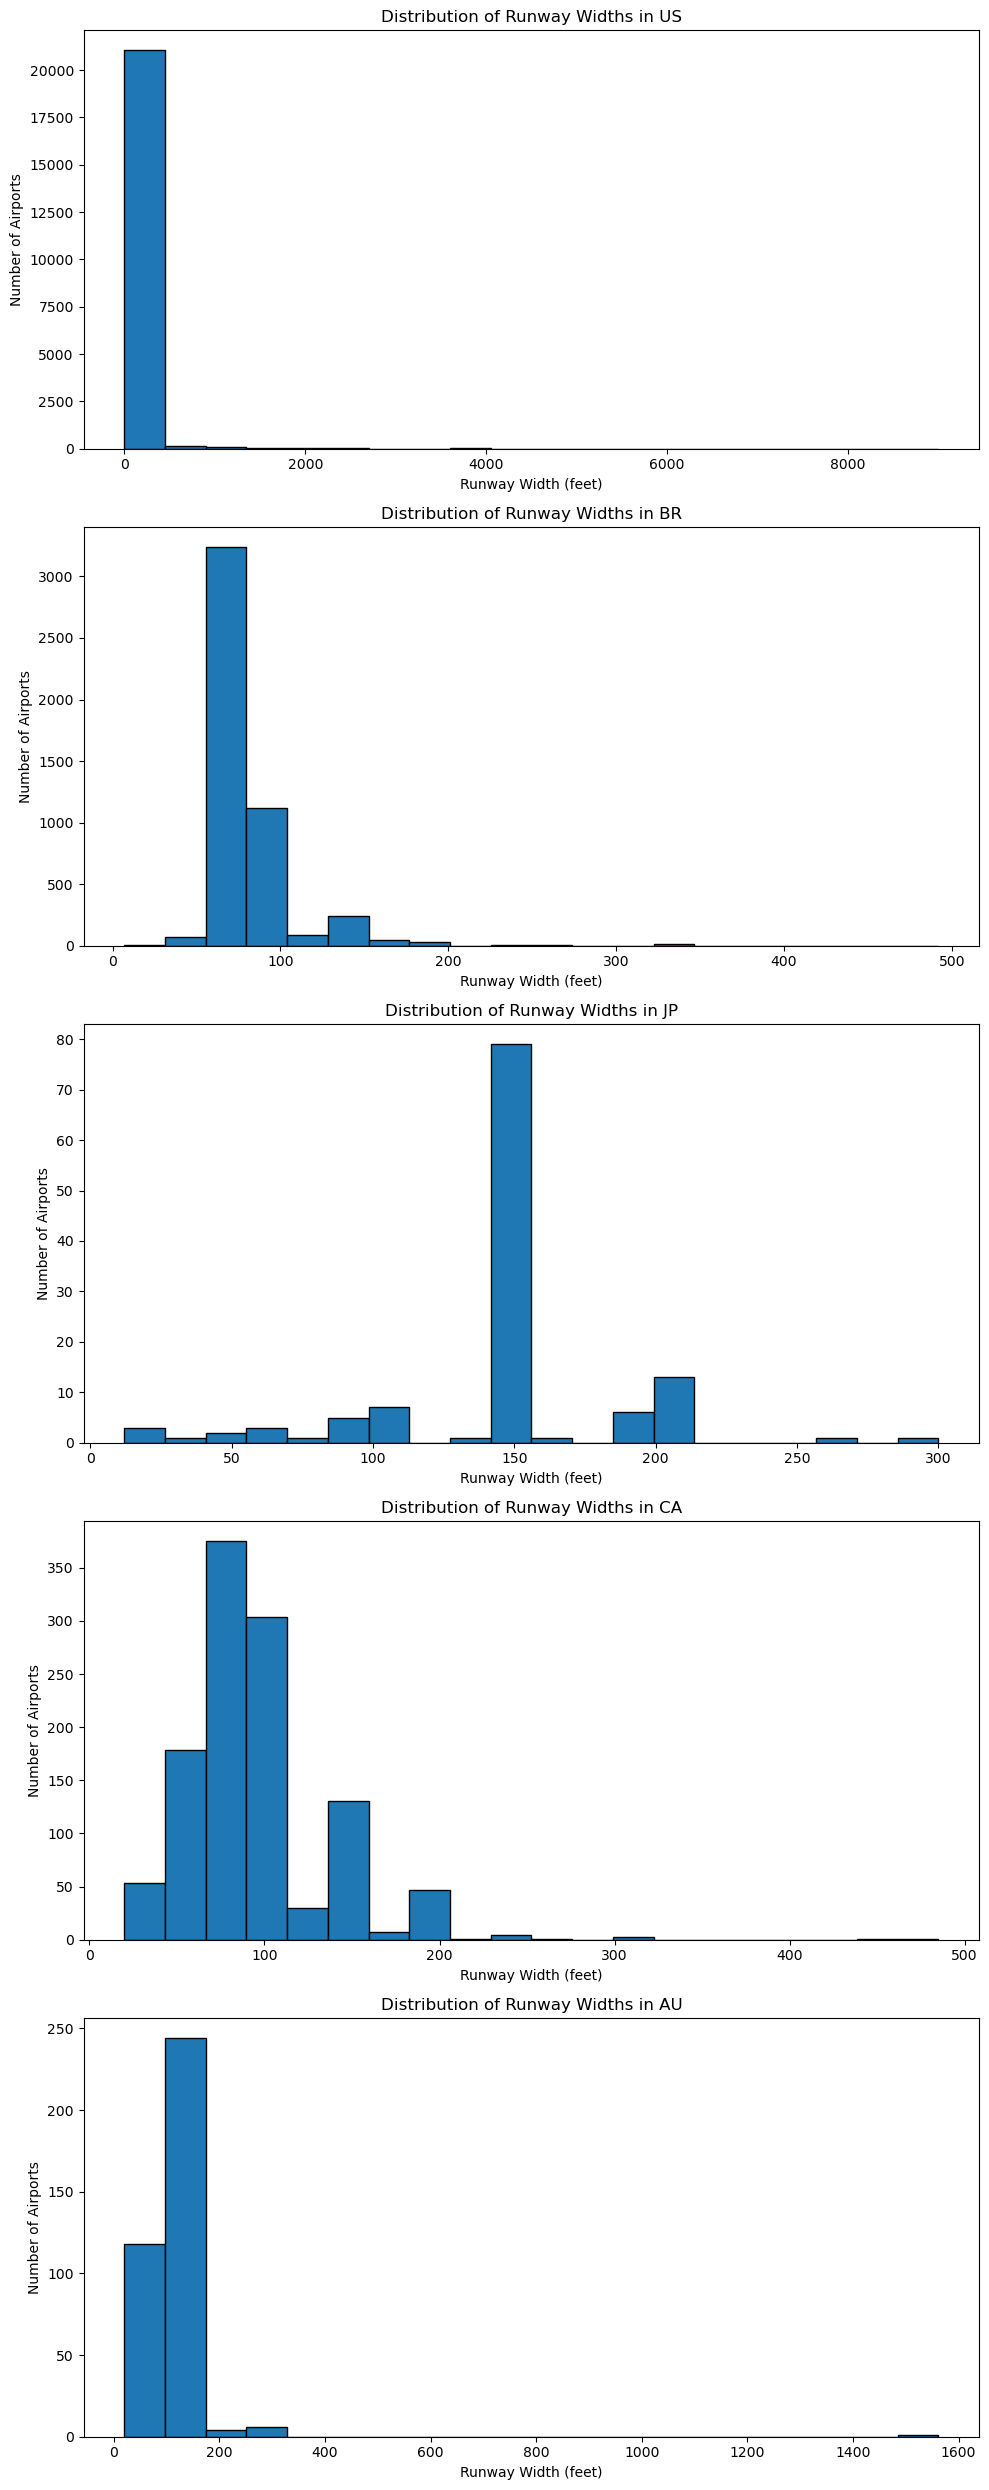

In [32]:
# Creating a figure and axes
fig, ax = plt.subplots(5, 1, figsize=(10, 25))

# Looping through the top 5 countries
for i, country in enumerate(top_countries.index):
    # Selecting the data for the current country
    data = top_countries_data.loc[top_countries_data['iso_country'] == country, 'runway_width_ft'].dropna()
    
    # Creating a histogram
    ax[i].hist(data, bins=20, edgecolor='black')
    
    # Setting the title and labels
    ax[i].set_title(f'Distribution of Runway Widths in {country}')
    ax[i].set_xlabel('Runway Width (feet)')
    ax[i].set_ylabel('Number of Airports')

# Adjusting the layout
plt.tight_layout()

# Displaying the plot
plt.show()


In [33]:
# Counting the number of airports with and without scheduled services in the top 5 countries
scheduled_service_counts = top_countries_data.groupby('iso_country')['scheduled_service'].value_counts()

# Displaying the counts
scheduled_service_counts


iso_country  scheduled_service
AU           no                    2389
             yes                    164
BR           no                    6520
             yes                    149
CA           no                    2705
             yes                    254
JP           no                    3229
             yes                     83
US           no                   29496
             yes                    507
Name: scheduled_service, dtype: int64

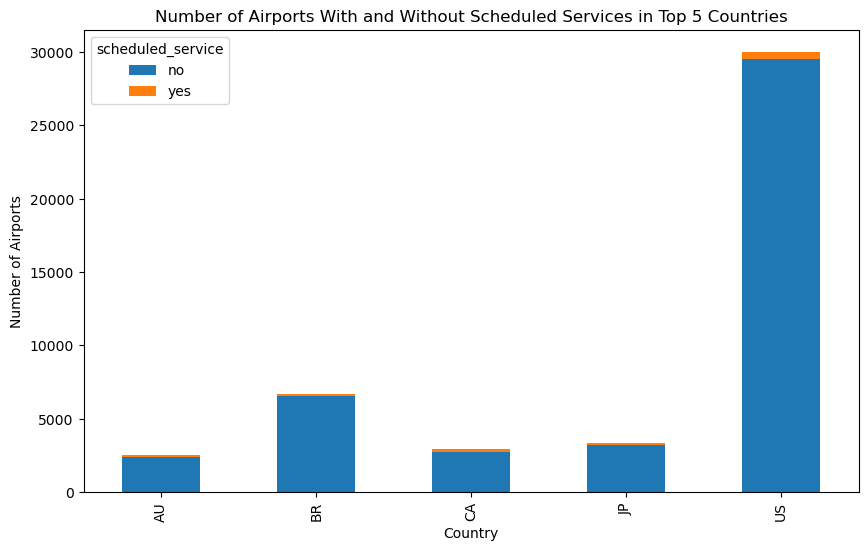

In [34]:
# Preparing the data for the plot
plot_data = scheduled_service_counts.unstack(level=1).fillna(0)

# Creating a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Creating a bar plot
plot_data.plot(kind='bar', stacked=True, ax=ax)

# Setting the title and labels
ax.set_title('Number of Airports With and Without Scheduled Services in Top 5 Countries')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Airports')

# Displaying the plot
plt.show()


In [35]:
# Counting the number of each type of runway surface in the top 5 countries
runway_surface_counts = top_countries_data.groupby('iso_country')['runway_surface'].value_counts()

# Displaying the counts
runway_surface_counts


iso_country  runway_surface  
AU           X                   351
             N                   273
             ASP                 216
             G                   167
             C                   111
                                ... 
US           asphalt/concrete      1
             asphalt/dirt          1
             lakebed               1
             tURF                  1
             water                 1
Name: runway_surface, Length: 441, dtype: int64

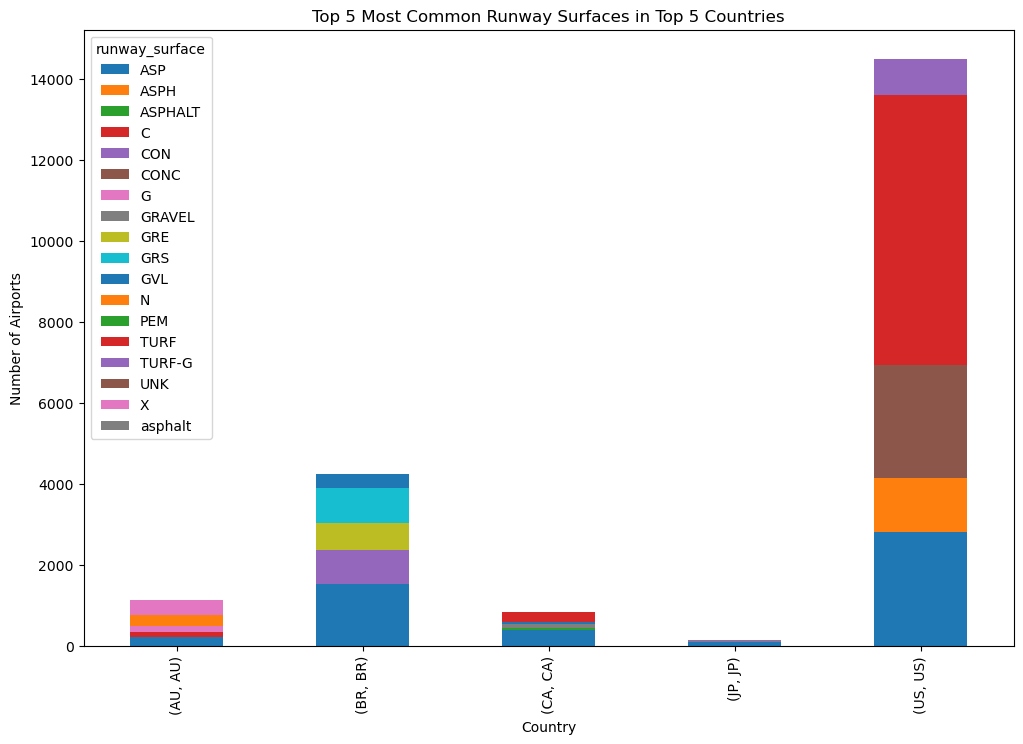

In [36]:
# Selecting the top 5 most common runway surfaces for each country
top_runway_surfaces = runway_surface_counts.groupby('iso_country').nlargest(5)

# Preparing the data for the plot
plot_data = top_runway_surfaces.unstack(level=-1).fillna(0)

# Creating a figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Creating a stacked bar plot
plot_data.plot(kind='bar', stacked=True, ax=ax)

# Setting the title and labels
ax.set_title('Top 5 Most Common Runway Surfaces in Top 5 Countries')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Airports')

# Displaying the plot
plt.show()


In [37]:
# Creating a new column to indicate whether an airport has an IATA code or not
top_countries_data['has_iata_code'] = ~top_countries_data['iata_code'].isna()

# Counting the number of airports with and without IATA codes in the top 5 countries
iata_code_counts = top_countries_data.groupby('iso_country')['has_iata_code'].value_counts()

# Displaying the counts
iata_code_counts


/tmp/ipykernel_20/1407171907.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_countries_data['has_iata_code'] = ~top_countries_data['iata_code'].isna()


iso_country  has_iata_code
AU           False             1946
             True               607
BR           False             6331
             True               338
CA           False             2482
             True               477
JP           False             3215
             True                97
US           False            28038
             True              1965
Name: has_iata_code, dtype: int64

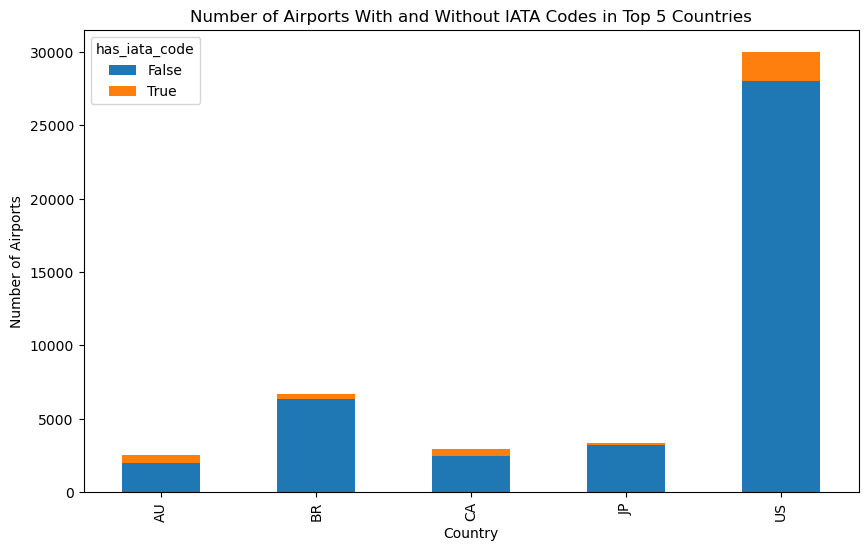

In [38]:
# Preparing the data for the plot
plot_data = iata_code_counts.unstack(level=1).fillna(0)

# Creating a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Creating a bar plot
plot_data.plot(kind='bar', stacked=True, ax=ax)

# Setting the title and labels
ax.set_title('Number of Airports With and Without IATA Codes in Top 5 Countries')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Airports')

# Displaying the plot
plt.show()


In [39]:
# Counting the number of each type of airport
airport_type_counts = top_countries_data['type'].value_counts()

# Displaying the counts
airport_type_counts


small_airport     22606
heliport          12955
closed             7235
medium_airport     1537
seaplane_base      1023
large_airport       106
balloonport          34
Name: type, dtype: int64

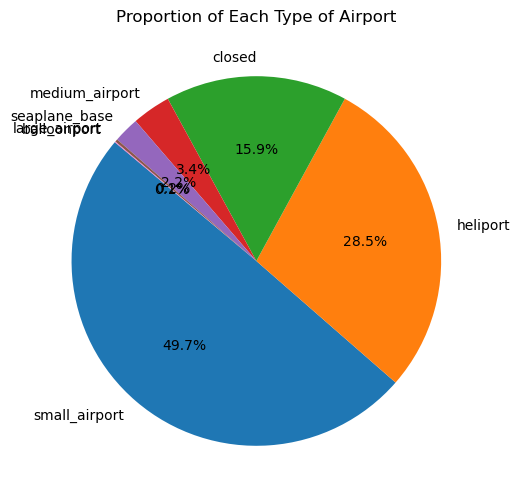

In [40]:
# Creating a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Creating a pie chart
ax.pie(airport_type_counts, labels=airport_type_counts.index, autopct='%1.1f%%', startangle=140)

# Setting the title
ax.set_title('Proportion of Each Type of Airport')

# Displaying the plot
plt.show()


<__array_function__ internals>:180: UserWarning: Warning: converting a masked element to nan.
/opt/conda/lib/python3.10/site-packages/matplotlib/colors.py:1311: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)
/opt/conda/lib/python3.10/site-packages/matplotlib/ticker.py:521: UserWarning: Warning: converting a masked element to nan.
  if self._useLocale else fmt % arg)


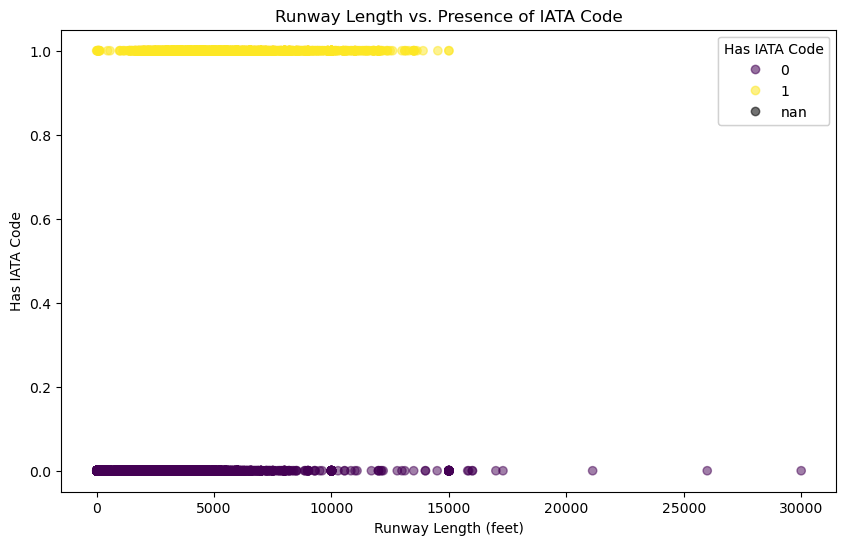

In [41]:
# Creating a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Creating a scatter plot
scatter = ax.scatter(top_countries_data['runway_length_ft'], top_countries_data['has_iata_code'],
                     c=top_countries_data['has_iata_code'], cmap='viridis', alpha=0.5)

# Setting the title and labels
ax.set_title('Runway Length vs. Presence of IATA Code')
ax.set_xlabel('Runway Length (feet)')
ax.set_ylabel('Has IATA Code')

# Adding a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Has IATA Code")
ax.add_artist(legend1)

# Displaying the plot
plt.show()
